# Cochlear Population Response Visualization

Visualize population firing rates across CF channels for different tone stimuli.

In [1]:
# Imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Add project to path
sys.path.insert(0, str(Path.cwd()))

# Import custom functions
from powerlaw_simulation_260126_1651 import (
    load_cochlea_results,
    organize_for_eachtone_allCFs,
    plot_spectrogram_forCFS
)

Found 40 .npz files
Loaded 1 frequencies
Loaded 2 frequencies
Loaded 3 frequencies
Loaded 4 frequencies
Loaded 5 frequencies
Loaded 6 frequencies
Loaded 7 frequencies
Loaded 8 frequencies
Loaded 9 frequencies
Loaded 10 frequencies
Loaded 11 frequencies
Loaded 12 frequencies
Loaded 13 frequencies
Loaded 14 frequencies
Loaded 15 frequencies
Loaded 16 frequencies
Loaded 17 frequencies
Loaded 18 frequencies
Loaded 19 frequencies
Loaded 20 frequencies
Loaded 21 frequencies
Loaded 22 frequencies
Loaded 23 frequencies
Loaded 24 frequencies
Loaded 25 frequencies
Loaded 26 frequencies
Loaded 27 frequencies
Loaded 28 frequencies
Loaded 29 frequencies
Loaded 30 frequencies
Loaded 31 frequencies
Loaded 32 frequencies
Loaded 33 frequencies
Loaded 34 frequencies
Loaded 35 frequencies
Loaded 36 frequencies
Loaded 37 frequencies
Loaded 38 frequencies
Loaded 39 frequencies
Loaded 40 frequencies


In [2]:
# Load data
input_dir = "./models_output/cochlea_test015_approximate"
results, population_results, cf_list = load_cochlea_results(input_dir)

Found 40 .npz files
Loaded 40 frequencies


In [3]:
# Check available dB levels
first_freq = list(population_results.keys())[0]
db_levels = list(population_results[first_freq].keys())
print(f"Available dB levels: {sorted(db_levels)}")

Available dB levels: [60.0]


In [4]:
# Organize data for a specific dB level
target_db = db_levels[0]  # Change this to desired dB level
response_matrix, tone_freqs = organize_for_eachtone_allCFs(population_results, cf_list, target_db)

print(f"\nResponse matrix shape: {response_matrix.shape}")
print(f"Tone frequencies: {tone_freqs}")
print(f"CF range: {cf_list[0]:.1f} - {cf_list[-1]:.1f} Hz")

Organized matrix shape: (40, 40)
  - 40 CF channels
  - 40 tone frequencies
  - dB level: 60.0

Response matrix shape: (40, 40)
Tone frequencies: [ 125.   141.3  158.6  176.9  196.3  216.9  238.7  261.8  286.3  312.4
  339.9  369.2  400.1  433.   467.8  504.8  543.9  585.4  629.4  676.1
  725.6  778.   833.6  892.6  955.1 1021.4 1091.6 1166.1 1245.1 1328.8
 1417.6 1511.7 1611.5 1717.3 1829.4 1948.3 2074.4 2208.1 2349.8 2500. ]
CF range: 125.0 - 2500.0 Hz


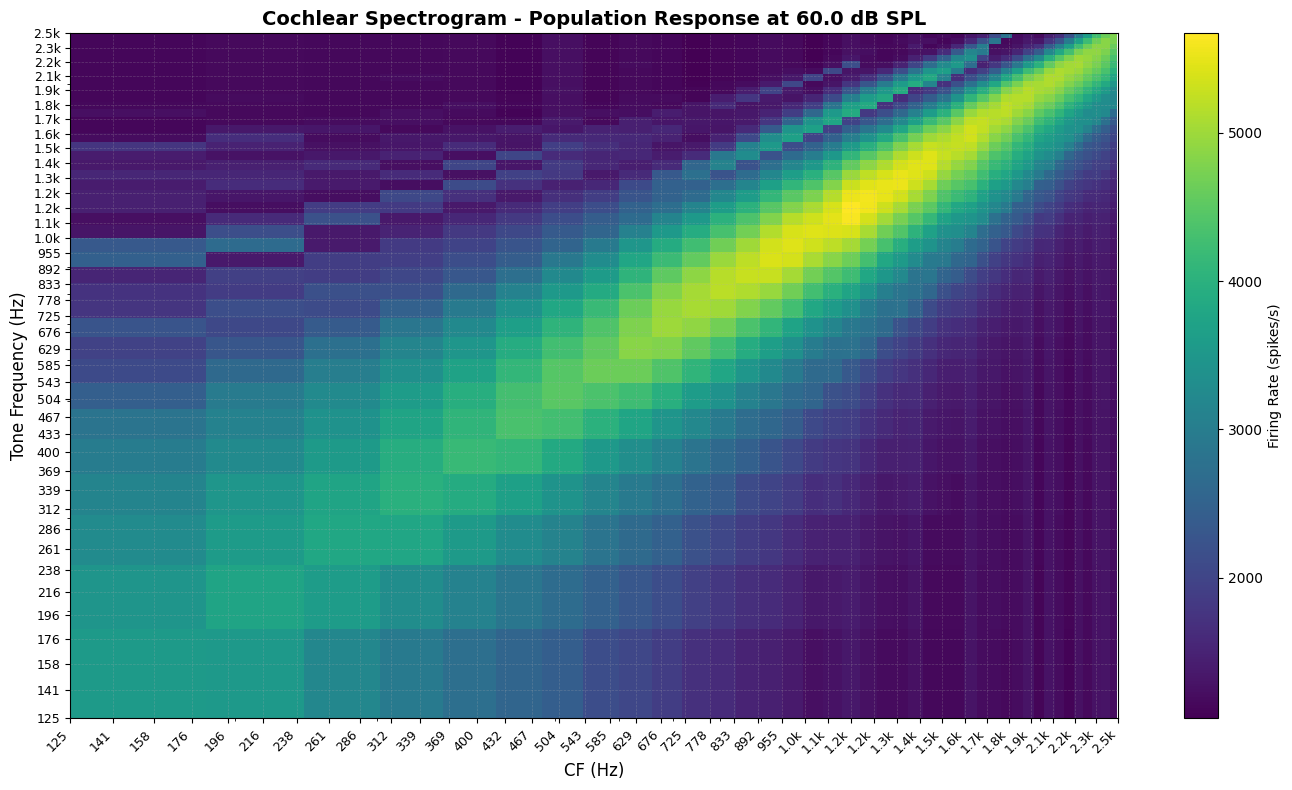

In [5]:
# Plot spectrogram
fig, ax = plot_spectrogram_forCFS(cf_list, tone_freqs, response_matrix, target_db)
plt.show()

In [ ]:
# Optional: Plot for multiple dB levels
from matplotlib.ticker import FuncFormatter

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

def hz_formatter(x, pos):
    if x >= 1000:
        return f'{x/1000:.1f}k'
    else:
        return f'{int(x)}'

for idx, db in enumerate(sorted(db_levels)[:4]):  # Plot first 4 dB levels
    response_matrix, tone_freqs = organize_for_eachtone_allCFs(population_results, cf_list, db)

    # Transpose matrix to have CFs on x-axis
    response_matrix_T = response_matrix.T

    im = axes[idx].imshow(response_matrix_T,
                          aspect='auto',
                          origin='lower',
                          cmap='viridis',
                          interpolation='nearest',
                          extent=[cf_list[0], cf_list[-1], tone_freqs[0], tone_freqs[-1]])

    axes[idx].set_xlabel('CF (Hz)')
    axes[idx].set_ylabel('Tone Frequency (Hz)')
    axes[idx].set_title(f'{db} dB SPL')
    axes[idx].set_xscale('log')
    axes[idx].set_yscale('log')

    # Set ticks to show all values
    axes[idx].set_xticks(cf_list)
    axes[idx].set_yticks(tone_freqs)

    # Format tick labels
    axes[idx].xaxis.set_major_formatter(FuncFormatter(hz_formatter))
    axes[idx].yaxis.set_major_formatter(FuncFormatter(hz_formatter))

    # Rotate labels for better readability
    plt.setp(axes[idx].get_xticklabels(), rotation=45, ha='right', fontsize=8)
    plt.setp(axes[idx].get_yticklabels(), fontsize=8)

    axes[idx].grid(True, alpha=0.3)

    plt.colorbar(im, ax=axes[idx], label='Firing Rate (spikes/s)')

plt.tight_layout()
plt.show()

## Tuning Curves for Each CF

Plot individual tuning curves showing how each CF channel responds to different tone frequencies.

In [ ]:
# Import the tuning curve plotting function
from powerlaw_simulation_260126_1651 import plot_tuning_curves

# Plot tuning curves for the target dB level
fig, axes = plot_tuning_curves(cf_list, tone_freqs, response_matrix, target_db)
plt.show()